In [9]:
import pandas as pd

# Define the datasets dictionary
datasets = {
    "poverty": r'C:\Users\JFB\Documents\Pythoncsv\Personal\populationinpoverty.csv',
    "economy": r'C:\Users\JFB\Documents\Pythoncsv\Personal\economicgrowth.csv',
    "education": r'C:\Users\JFB\Documents\Pythoncsv\Personal\educationspending.csv',
    "electricity": r'C:\Users\JFB\Documents\Pythoncsv\Personal\electricityaccess.csv',
    "tourism": r'C:\Users\JFB\Documents\Pythoncsv\Personal\tourismtrips.csv'
}

# Load each dataset and filter for Honduras
honduras_datasets = {}
for key, path in datasets.items():
    data = pd.read_csv(path)
    honduras_data = data[data['Entity'] == 'Honduras']
    honduras_datasets[key] = honduras_data
    print(f"First few rows of {key} dataset:")
    display(honduras_data.head())

First few rows of poverty dataset:


,Entity,Year,Share below $1 a day,Share below $2.15 a day
900,Honduras,1989,16.559424,39.959561
901,Honduras,1990,18.560977,41.997452
902,Honduras,1991,9.142681,30.774723
903,Honduras,1992,6.505092,26.968343
904,Honduras,1993,5.668213,21.429638


First few rows of economy dataset:


,Entity,Year,GDP per capita
4259,Honduras,1950,2339.0276
4260,Honduras,1951,2342.1228
4261,Honduras,1952,2286.0479
4262,Honduras,1953,2383.3480
4263,Honduras,1954,2150.4941


First few rows of education dataset:


,Entity,Year,education spending
1605,Honduras,1994,12.888750
1606,Honduras,1995,17.875640
1607,Honduras,2012,15.732625
1608,Honduras,2013,19.864070
1609,Honduras,2014,25.653620


First few rows of electricity dataset:


,Entity,Year,urban access to electricity percentage,rural access to electricity percentage
18607,Honduras,1991,88.700620,31.257088
18608,Honduras,1992,89.851265,37.012500
18609,Honduras,1993,92.082520,38.717102
18610,Honduras,1994,92.144470,44.522860
18611,Honduras,1995,93.264250,45.695538


First few rows of tourism dataset:


,Entity,Year,tourists
1980,Honduras,1995,271000.0
1981,Honduras,1996,263000.0
1982,Honduras,1997,307000.0
1983,Honduras,1998,321000.0
1984,Honduras,1999,371000.0


In [10]:
# Start with the poverty dataset as the base
merged_data = honduras_datasets['poverty']

# Merge other datasets based on "Entity" and "Year"
for key, dataset in honduras_datasets.items():
    if key != 'poverty':
        merged_data = pd.merge(merged_data, dataset, on=['Entity', 'Year'], how='outer')

# Display the merged data
print("Merged Data:")
display(merged_data.head())

Merged Data:


,Entity,Year,Share below $1 a day,Share below $2.15 a day,GDP per capita,education spending,urban access to electricity percentage,rural access to electricity percentage,tourists
0,Honduras,1989,16.559424,39.959561,3166.6462,NaN,NaN,NaN,NaN
1,Honduras,1990,18.560977,41.997452,3253.6936,NaN,NaN,NaN,NaN
2,Honduras,1991,9.142681,30.774723,3317.5164,NaN,88.700620,31.257088,NaN
3,Honduras,1992,6.505092,26.968343,3328.1123,NaN,89.851265,37.012500,NaN
4,Honduras,1993,5.668213,21.429638,3499.3900,NaN,92.082520,38.717102,NaN


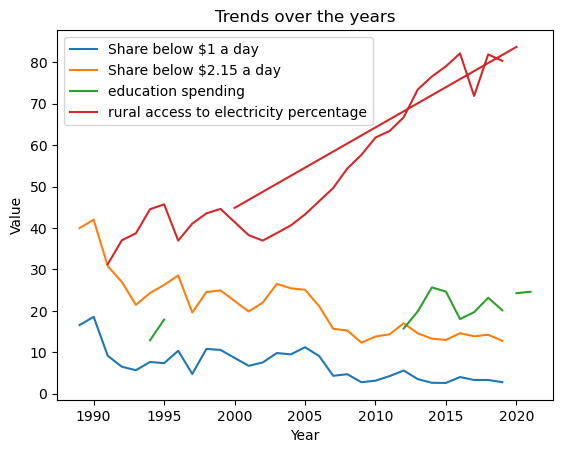

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting the trend of a few key metrics against Year
metrics = ["Share below $1 a day", "Share below $2.15 a day",  "education spending", "rural access to electricity percentage"]
for metric in metrics:
    plt.plot(merged_data['Year'], merged_data[metric], label=metric)

plt.title("Trends over the years")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.show()